## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Dataset Preprocessing

### Importing

In [3]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Divide the dataset according to which variables you want to experiment on

In [5]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [6]:
pd.DataFrame(X, columns = ["Gender","Age","Hypertension","Heart_disease","Smoking_history","BMI","HbA1c_level","Blood_glucose_level"])

,Gender,Age,Hypertension,Heart_disease,Smoking_history,BMI,HbA1c_level,Blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [7]:
pd.DataFrame(y, columns = ["Diabetes"])

,Diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [8]:
X

array([['Female', 80.0, 0, ..., 25.19, 6.6, 140],
       ['Female', 54.0, 0, ..., 27.32, 6.6, 80],
       ['Male', 28.0, 0, ..., 27.32, 5.7, 158],
       ...,
       ['Male', 66.0, 0, ..., 27.83, 5.7, 155],
       ['Female', 24.0, 0, ..., 35.42, 4.0, 100],
       ['Female', 57.0, 0, ..., 22.43, 6.6, 90]], dtype=object)

In [9]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Encode Categorical Data (in this case, we label encode Gender Column)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [11]:
print(X)

[[0 80.0 0 ... 25.19 6.6 140]
 [0 54.0 0 ... 27.32 6.6 80]
 [1 28.0 0 ... 27.32 5.7 158]
 ...
 [1 66.0 0 ... 27.83 5.7 155]
 [0 24.0 0 ... 35.42 4.0 100]
 [0 57.0 0 ... 22.43 6.6 90]]


### One Hot Encoding the Smoking History Column (change into numerical)

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [13]:
print(X)

[[0.0 0.0 0.0 ... 25.19 6.6 140]
 [1.0 0.0 0.0 ... 27.32 6.6 80]
 [0.0 0.0 0.0 ... 27.32 5.7 158]
 ...
 [0.0 0.0 0.0 ... 27.83 5.7 155]
 [0.0 0.0 0.0 ... 35.42 4.0 100]
 [0.0 1.0 0.0 ... 22.43 6.6 90]]


### Splitting Dataset into Testing & Training

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the Artficial Neural Network

### Initialize the ANN

In [16]:
ann = tf.keras.models.Sequential()

### Adding the Input Layer & 1st Hidden Layer

In [17]:
ann.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))

### Adding the 2nd Hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

### Adding the 3rd Hidden layer

In [19]:
#ann.add(tf.keras.layers.Dense(units=3, activation='relu'))

### Adding the Output Layer

In [20]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the Artificial Neural Network

### Compiling the ANN

In [21]:
#ann.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy']) #Accuracy: 0.91485, linear 1st to 3rd Hidden Layer (5,4 3 units respectively)
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) #Accuracy: 0.96815, sigmoid 1st and 2nd Hidden Layer[no 3rd] (5,6 units respectively)

### Using the Training Set

In [22]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
2500/2500 [==============================] - 3s 901us/step - loss: 0.1995 - accuracy: 0.9280
Epoch 2/100
2500/2500 [==============================] - 2s 918us/step - loss: 0.1227 - accuracy: 0.9594
Epoch 3/100
2500/2500 [==============================] - 2s 917us/step - loss: 0.1185 - accuracy: 0.9600
Epoch 4/100
2500/2500 [==============================] - 2s 889us/step - loss: 0.1168 - accuracy: 0.9600
Epoch 5/100
2500/2500 [==============================] - 2s 890us/step - loss: 0.1158 - accuracy: 0.9601
Epoch 6/100
2500/2500 [==============================] - 2s 891us/step - loss: 0.1149 - accuracy: 0.9601
Epoch 7/100
2500/2500 [==============================] - 2s 893us/step - loss: 0.1144 - accuracy: 0.9602
Epoch 8/100
2500/2500 [==============================] - 2s 907us/step - loss: 0.1139 - accuracy: 0.9603
Epoch 9/100
2500/2500 [==============================] - 2s 910us/step - loss: 0.1135 - accuracy: 0.9607
Epoch 10/100
2500/2500 [==============================]

# Predictions & Evaluating the Model

### Predicting Test Set Results

In [23]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

625/625 [==============================] - 1s 715us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy = accuracy_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("Accuracy: " + str(accuracy))
print("Specificity: " + str(specificity))
print("Sensitivity: " + str(sensitivity))

[[18249    48]
 [  589  1114]]
Accuracy: 0.96815
Specificity: 0.9973766191178882
Sensitivity: 0.6541397533763946


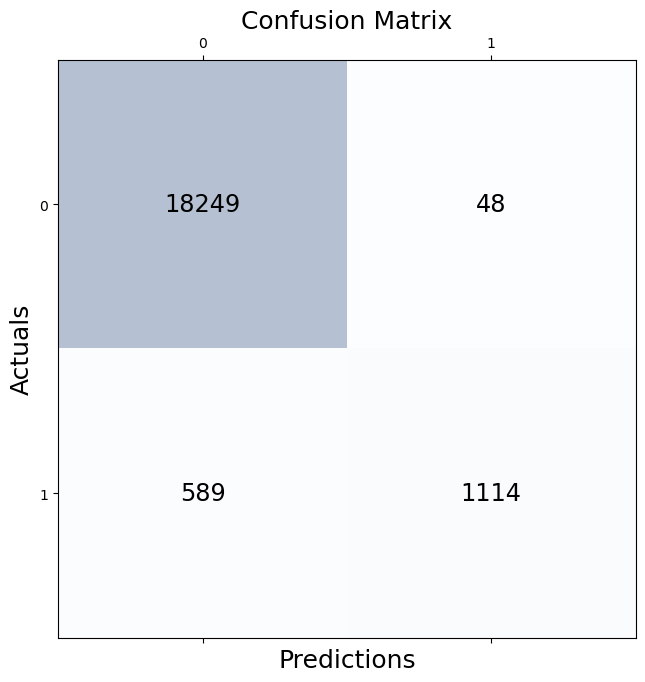

In [25]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [27]:
# Weird results from my initial experiment of Adadelta, 3 Hidden Linear Layers with (5,4,3 units)
# [[18297     0]
#  [ 1703     0]]
# Accuracy: 0.91485
# Specificity: 1.0
# Sensitivity: 0.0

# Compared to results from current selection, it seems that the current experiment is a better model